In [1]:
import time
start_time=time.time()

In [2]:
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import lmfit
from scipy import interpolate
import pickle

from bfunc import bfunc03s

Data load and region parameters

In [3]:
name = 'CarC'

In [4]:
reg = 'Carina'

In [5]:
pickle_in = open('SFresults//' + name + '.pkl',"rb")
SFresults = pickle.load(pickle_in)

In [6]:
B = SFresults['b2']
r = SFresults['s']
#s0 = SFresults['s0']*2.355   
s0 = 0.03  
m = SFresults['m'] 
sig2 = SFresults['sig2'] 
r0 = SFresults['r0'] 
noise = B.mean()*0.05

In [7]:
model02 = lmfit.Model(bfunc03s)
model02.param_names

['r0', 'sig2', 'm', 's0', 'noise']

In [8]:
relative_uncertainty = 0.275
weights = 1.0 / (relative_uncertainty * B)
weights[r > r0] /= 1.75

In [9]:
for p in model02.param_names:
    model02.set_param_hint(p, min=0.0)
#model02.set_param_hint("sig2", value=sig2, vary=False)
#model02.set_param_hint("s0", min=0.2)
model02.print_param_hints()

Name      Value      Min      Max     Vary    Expr    
m           nan        0      inf     True    
noise       nan        0      inf     True    
r0          nan        0      inf     True    
s0          nan        0      inf     True    
sig2        nan        0      inf     True    


In [10]:
result2 = model02.fit(
    B, 
    weights=weights,
    r = r, r0 = r0, m = m, s0 = s0, noise = noise, sig2=sig2,
)

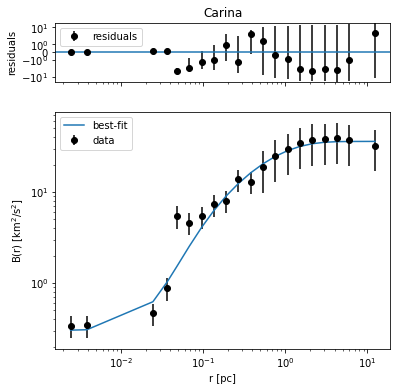

In [11]:
fig, _ = result2.plot( 'ko')
fig.axes[0].set(
    title=reg,
    xscale="log",
    yscale="symlog",
)
fig.axes[1].set(
    xscale = "log",
    yscale = "log",
    xlabel = "r [pc]",
    ylabel = r"B(r) [km$^{2}$/s$^{2}$]",
);

plt.savefig('Imgs//SF//' + reg + '.pdf', bbox_inches='tight')



In [12]:
CIresults = {'resultCI' : result2,
            'Rmax/r0' : r.max()/result2.params['r0'].value,
            'lT' : (r[3]/2**0.5)*((result2.params['r0'].value/r[3])**(result2.params['m'].value/2))
          }

In [13]:
f = open('CIresults//' + name +'.pkl',"wb")
pickle.dump(CIresults,f)
f.close()

In [14]:
print(result2.fit_report())

[[Model]]
    Model(bfunc03s)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 66
    # data points      = 20
    # variables        = 5
    chi-square         = 14.2062185
    reduced chi-square = 0.94708123
    Akaike info crit   = 3.15895035
    Bayesian info crit = 8.13761172
[[Variables]]
    r0:     0.39373275 +/- 0.18824294 (47.81%) (init = 0.4808652)
    sig2:   18.5898434 +/- 6.25710858 (33.66%) (init = 17.88722)
    m:      0.86072238 +/- 0.78319866 (90.99%) (init = 1.1)
    s0:     0.03997145 +/- 0.07322064 (183.18%) (init = 0.03)
    noise:  0.30113855 +/- 0.06318827 (20.98%) (init = 0.8790085)
[[Correlations]] (unreported correlations are < 0.100)
    C(m, s0)     = -0.982
    C(sig2, m)   = -0.839
    C(sig2, s0)  =  0.816
    C(r0, s0)    = -0.317
    C(r0, sig2)  =  0.199
    C(r0, m)     =  0.193
    C(r0, noise) = -0.119


In [15]:
result2.params.pretty_print()

Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
m        0.8607        0      inf   0.7832     True     None     None
noise    0.3011        0      inf  0.06319     True     None     None
r0       0.3937        0      inf   0.1882     True     None     None
s0      0.03997        0      inf  0.07322     True     None     None
sig2      18.59        0      inf    6.257     True     None     None


In [16]:
print('-------------------------------')
print('Parameter    Value       Stderr')
for name, param in result2.params.items():
    print('{:7s} {:11.5f} {:11.5f}'.format(name, param.value, param.stderr))

-------------------------------
Parameter    Value       Stderr
r0          0.39373     0.18824
sig2       18.58984     6.25711
m           0.86072     0.78320
s0          0.03997     0.07322
noise       0.30114     0.06319


In [17]:
result2.params['r0'].stderr

0.18824294181628387

In [18]:
for p in result2.model.param_names:
    result2.params[p].stderr = result2.params[p].value * 0.1

In [19]:
result2.conf_interval()
print(result2.ci_report())

C:\Users\ZAINTEL2\anaconda3\lib\site-packages\lmfit\confidence.py:327: UserWarning: rel_change=-1.0 < 1e-05 at iteration 9 and prob(r0=0.039373275168115784) = 0.0 < max(sigmas).
  warn(errmsg)
C:\Users\ZAINTEL2\anaconda3\lib\site-packages\lmfit\confidence.py:319: UserWarning: maxiter=200 reached and prob(r0=8.307761060472462) = 0.9227414397994105 < max(sigmas).
  warn(errmsg)
C:\Users\ZAINTEL2\anaconda3\lib\site-packages\lmfit\confidence.py:319: UserWarning: maxiter=200 reached and prob(sig2=392.24569529139023) = 0.880968159394963 < max(sigmas).
  warn(errmsg)
C:\Users\ZAINTEL2\anaconda3\lib\site-packages\lmfit\confidence.py:312: UserWarning: Bound reached with prob(m=0.0) = 0.9692327000545775 < max(sigmas)
  warn(errmsg)
C:\Users\ZAINTEL2\anaconda3\lib\site-packages\lmfit\confidence.py:312: UserWarning: Bound reached with prob(s0=0.0) = 0.9808946593149914 < max(sigmas)
  warn(errmsg)
C:\Users\ZAINTEL2\anaconda3\lib\site-packages\lmfit\confidence.py:327: UserWarning: rel_change=-1.0 < 

          99.73%    95.45%    68.27%    _BEST_    68.27%    95.45%    99.73%
 r0   :      -inf      -inf      -inf   0.39373  +0.26510      +inf      +inf
 sig2 : -12.56932  -7.89980  -3.89220  18.58984  +6.11133      +inf      +inf
 m    :      -inf  -0.77592  -0.30550   0.86072  +0.29416  +0.64246  +1.45645
 s0   :      -inf  -0.03306  -0.01925   0.03997      +inf      +inf      +inf
 noise:  -0.22476  -0.13626  -0.06445   0.30114  +0.06413  +0.13485  +0.22095


In [20]:
plt.style.use([
    "seaborn-poster",
])

In [21]:
plot_limits = {
    "s0": [0.0, 0.1],
    "m": [.5, .5],
    "r0": [0.1, 1.0],
    "noise": [0.0, 0.5],
}

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

plt.title('M8')
levels = [0.6827, 0.9545, 0.9973]
colors = ["g", "y", "r"]

for ax, [xvar, yvar] in zip(axes.flat, [
    ["s0", "noise"],
    ["r0", "m"],
    ["m", "s0"],
    ["r0", "s0"],
]):
    cx, cy, grid = lmfit.conf_interval2d(
        result2, result2, xvar, yvar, 30, 30,
        limits=[plot_limits[xvar], plot_limits[yvar]],
    )
    ctp = ax.contour(cx, cy, grid, levels, colors=colors)
    ax.set_xlabel(xvar)
    ax.set_ylabel(yvar)

fig.tight_layout();

In [22]:
print("--- %s seconds ---" % (time.time()-start_time))

--- 140.53456830978394 seconds ---
